Loading required package: Matrix



Warning message in file(con, "r"):
“URL 'https://inla.r-inla-download.org/VERSIONS': Timeout of 2 seconds was reached”
This is INLA_25.06.07 built 2025-06-11 18:54:45 UTC.
 - See www.r-inla.org/contact-us for how to get help.
 - List available models/likelihoods/etc with inla.list.models()
 - Use inla.doc(<NAME>) to access documentation


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


This is rSPDE 2.5.1
- See https://davidbolin.github.io/rSPDE for vignettes and manuals.

Rows: 1595 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ins_id
dbl (2): Date, close

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types o

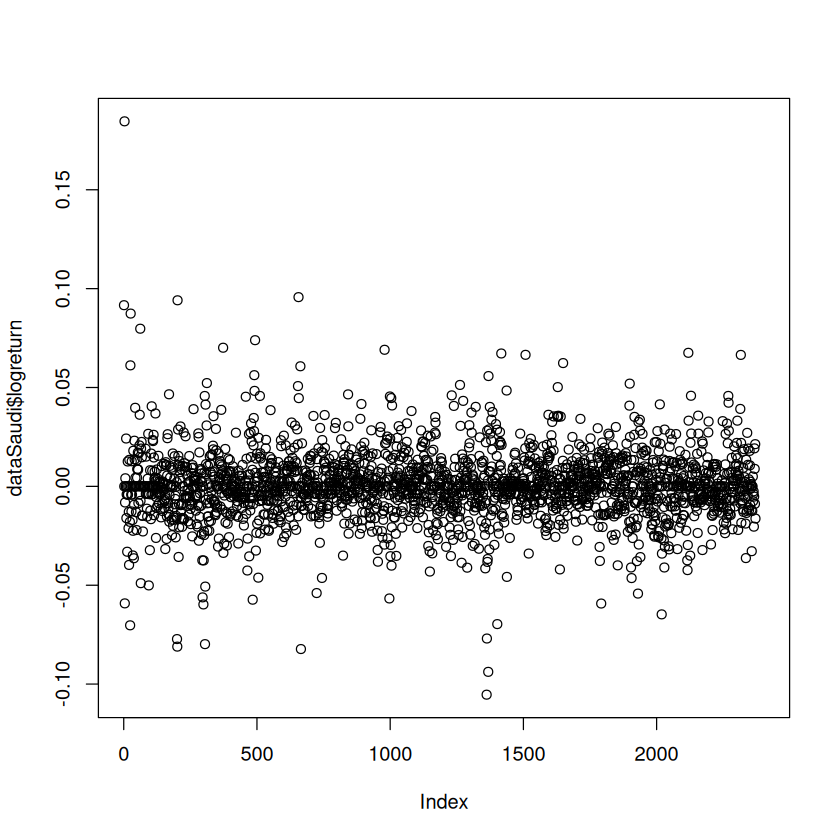

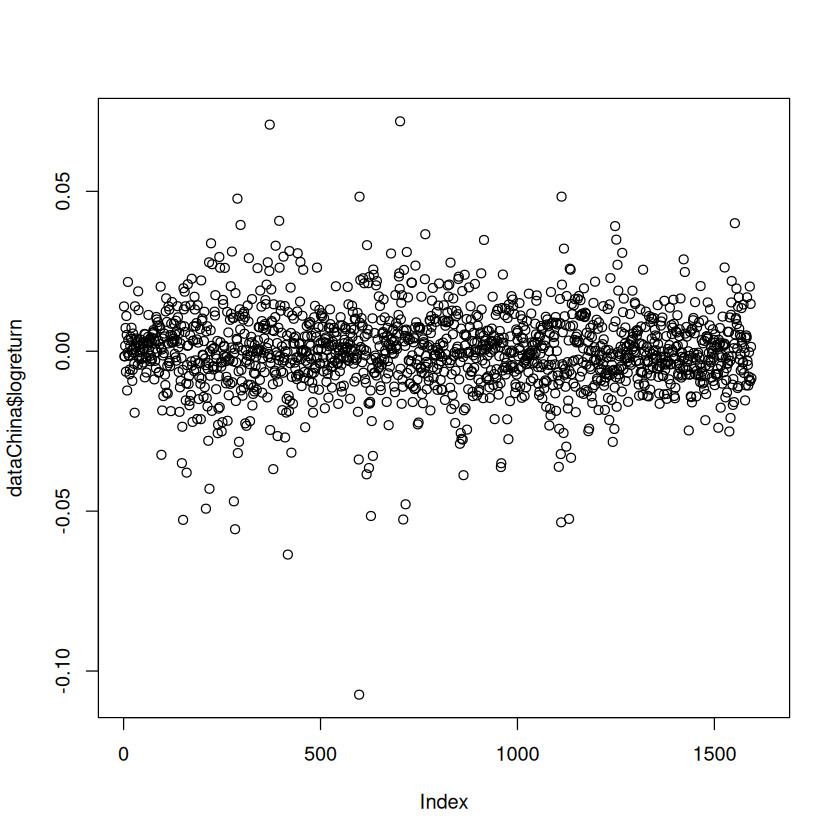

In [1]:
source("helper.R")
data_ori <- as.data.frame(read_csv("data/IFclose.csv"))
logpt<-log(data_ori$close)
logreturn <-logpt[2:length(logpt)]-logpt[1:(length(logpt)-1)]
date <- as.Date(as.character(data_ori$Date[1:(length(data_ori$Date)-1)]), format = "%Y%m%d")
date_timeindex<-as.numeric(as.POSIXct(date)) 
date_timeindex <- (date_timeindex - min(date_timeindex))/86400 ## 1 day = 86400 seconds



dataChina = data.frame(logreturn = logreturn, times = date_timeindex)
dataChina <- rbind(dataChina, data.frame(logreturn = NA, times = max(date_timeindex):(max(date_timeindex)+31)))
mesh <- fm_mesh_1d(dataChina$times)


data_ori <- as.data.frame(read_csv("data/1180_vol.csv"))
logpt<-log(data_ori$Close)
logreturn <-logpt[2:length(logpt)]-logpt[1:(length(logpt)-1)] ## 1 day = 86400 seconds
date <- data_ori$Date[1:(length(data_ori$Date)-1)]
date_timeindex<-as.numeric(as.POSIXct(date)) 
date_timeindex <- (date_timeindex - min(date_timeindex))/86400


dataSaudi = data.frame(logreturn = logreturn, times = date_timeindex)
dataSaudi <- rbind(dataSaudi, data.frame(logreturn = NA, times = max(date_timeindex):(max(date_timeindex)+31)))
mesh <- fm_mesh_1d(dataSaudi$times)
if(TRUE){
    data=dataChina
}else{
    data=dataSaudi
}

par(bg = "white") 
plot(dataSaudi$logreturn)
plot(dataChina$logreturn)


# 5 models

In [2]:

OU_model <- rspde.matern(mesh = mesh,parameterization="matern")
formula_OU <-  logreturn ~ -1 + Intercept(1)+ field(times, model = OU_model)
fit<-bru(formula_OU, family="stochvol", data = data)
result_fit<- rspde.result(fit, "field", OU_model, parameterization="matern")
print(fit$mlik[2])
summary(result_fit)

[1] -29131.29


,mean,sd,0.025quant,0.5quant,0.975quant,mode
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
std.dev,0.0258634,0.0300101,0.00106683,0.0160985,0.107923,0.00243619
range,0.2276420,0.1389850,0.04311720,0.2008690,0.565498,0.12412400
nu,0.9934140,0.5590340,0.07733720,0.9995380,1.905150,1.67945000


In [3]:

rspde.order=2
prior.range.nominal=0.5
prior.std.dev.nominal=10
OU_model <- rspde.matern(mesh = mesh,parameterization="matern",rspde.order=rspde.order,prior.range.nominal=prior.range.nominal,prior.std.dev.nominal=prior.std.dev.nominal)
formula_OU <- logreturn ~ -1 + Intercept(1)+ field(times, model = OU_model)
fit<-bru(formula_OU, family="stochvol.t", data = data)
result_fit<- rspde.result(fit, "field", OU_model, parameterization="matern")
print(fit$mlik[2])
summary(result_fit)

Warning message in rspde.result(fit, "field", OU_model, parameterization = "matern"):
“the mean or mode of nu is very close to nu.upper.bound, please consider increasing nu.upper.bound, and refitting the model.”


[1] 4839.099


,mean,sd,0.025quant,0.5quant,0.975quant,mode
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
std.dev,0.621503,0.087844,0.466127,0.615674,0.81054,0.604828
range,86.701200,20.041100,53.962300,84.456600,132.34400,80.115200
nu,1.813320,0.438182,0.221693,1.997470,2.00000,2.000000


In [4]:

OU_model <- rspde.matern(mesh = mesh,parameterization="matern")
formula_OU <- logreturn ~ -1 + Intercept(1)+ field(times, model = OU_model)
fit<-bru(formula_OU, family="stochvol.t", data = data)
result_fit<- rspde.result(fit, "field", OU_model, parameterization="matern")
print(fit$mlik[2])
summary(result_fit)

Warning message in rspde.result(fit, "field", OU_model, parameterization = "matern"):
“the mean or mode of nu is very close to nu.upper.bound, please consider increasing nu.upper.bound, and refitting the model.”


[1] 4840.701


,mean,sd,0.025quant,0.5quant,0.975quant,mode
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
std.dev,0.626241,0.0892291,0.468783,0.620205,0.818631,0.608876
range,90.966500,22.2609000,51.923800,89.716500,138.373000,87.443200
nu,1.693430,0.3382780,0.872612,1.837390,1.999360,1.999990


In [5]:

OU_model <- rspde.matern(mesh = mesh,parameterization="matern")
formula_OU <- logreturn ~ -1 + Intercept(1)+ field(times, model = OU_model)
fit<-bru(formula_OU, family="stochvol.nig", data = data)
result_fit<- rspde.result(fit, "field", OU_model, parameterization="matern")
print(fit$mlik[2])
summary(result_fit)

Warning message in rspde.result(fit, "field", OU_model, parameterization = "matern"):
“the mean or mode of nu is very close to nu.upper.bound, please consider increasing nu.upper.bound, and refitting the model.”


[1] 4839.456


,mean,sd,0.025quant,0.5quant,0.975quant,mode
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
std.dev,0.634525,0.0880088,0.477793,0.62912,0.822844,0.61907
range,84.694600,21.1675000,46.777700,83.89190,128.519000,82.30090
nu,1.727590,0.3407050,0.856853,1.89444,1.999880,2.00000


In [6]:

OU_model <- rspde.matern(mesh = mesh,parameterization="matern")
formula_OU <- logreturn ~ -1 + Intercept(1)+ field(times, model = OU_model)
fit<-bru(formula_OU, family="stochvolln", data = data)
result_fit<- rspde.result(fit, "field", OU_model, parameterization="matern")
print(fit$mlik[2])
summary(result_fit)

[1] 4807.287


,mean,sd,0.025quant,0.5quant,0.975quant,mode
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
std.dev,1.179080,0.09047750,0.985172,1.18779,1.331110,1.229800
range,550.403000,11.64420000,527.852000,550.34300,573.585000,550.197000
nu,0.492398,0.00413411,0.483223,0.49289,0.499136,0.494762


In [7]:
rspde_model1 <- rspde.matern(mesh = mesh,nu.upper.bound=1)

rspde_model2 <- rspde.matern(mesh = mesh,nu.upper.bound=2)
formula <- logreturn ~ -1 + Intercept(1) + rough(times, model = rspde_model1) + smooth(times, model = rspde_model2)+f(times,model="iid")

fit <- bru(formula, family="stochvol", data = data)
result_fit1<- rspde.result(fit, "rough", rspde_model1, parameterization="matern")
result_fit2<- rspde.result(fit, "smooth", rspde_model2, parameterization="matern")
print(fit$mlik[2])
rbind(summary(result_fit1),summary(result_fit2))

[1] -66155.47


,mean,sd,0.025quant,0.5quant,0.975quant,mode
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
std.dev,0.01152810,0.002381430,0.00779870,0.01121930,0.01698280,0.01093380
range,0.29116400,0.059953800,0.19351100,0.28357400,0.42636900,0.26644100
nu,0.38884300,0.049499700,0.30754600,0.38298600,0.49912400,0.36444800
std.dev1,0.00214296,0.000539691,0.00130961,0.00206268,0.00342609,0.00192945
range1,0.24224900,0.051900300,0.15625300,0.23704000,0.36046700,0.23476700
nu1,0.46678500,0.056176800,0.34982200,0.47074500,0.56611200,0.48982300
